In [1]:
import sys
sys.path.append('/scratch/nf33/sc5932/hk25-AusNode-TConvZones/functions')

from SC_function import get_nn_lon_lat_index

import xarray as xr
import healpy as hp
import easygems.healpix as egh
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from dask.diagnostics import ProgressBar


In [2]:
mean_era5_loaded = xr.open_dataset('/scratch/nf33/sc5932/Data/seasonal_era5.nc').tp
mean_uk_aligned = xr.open_dataset('/scratch/nf33/sc5932/Data/seasonal_uk_aligned.nc').pr
mean_germany_aligned = xr.open_dataset('/scratch/nf33/sc5932/Data/seasonal_germany_aligned.nc').pr

diff_germany = mean_germany_aligned - mean_era5_loaded
diff_uk = mean_uk_aligned - mean_era5_loaded


In [5]:
diff_germany 

<xarray.DataArray (season: 4, latitude: 721, longitude: 1440)> Size: 33MB
array([[[-5.13818758e-02, -1.99945467e-02, -1.99945467e-02, ...,
         -5.13818758e-02, -5.13818758e-02, -5.13818758e-02],
        [-3.63923916e-02, -4.69631108e-03, -4.56862964e-03, ...,
         -3.69579266e-02, -3.67094636e-02, -3.65462179e-02],
        [ 6.89056834e-02,  6.80663255e-02,  6.85158308e-02, ...,
          6.78836575e-02,  6.83037712e-02,  6.87249005e-02],
        ...,
        [-4.71718288e-03,  7.94016940e-02,  7.94738376e-02, ...,
         -4.88680389e-03, -4.85063070e-03, -4.70390705e-03],
        [-2.46719383e-02,  2.70913897e-02,  2.71647512e-02, ...,
         -2.46331259e-02, -2.47197632e-02, -2.47081115e-02],
        [-1.23068928e-02, -4.65212105e-02, -4.65212105e-02, ...,
         -1.23068928e-02, -1.23068928e-02, -1.23068928e-02]],

       [[ 7.68990649e-01,  9.84121932e-01,  9.84121932e-01, ...,
          7.68990649e-01,  7.68990649e-01,  7.68990649e-01],
        [ 8.26096621e-01,  1.04132380e+00,  1.04157948e+00, ...,
          8.25521719e-01,  8.25839261e-01,  8.26042097e-01],
        [ 9.66990140e-01,  1.12279395e+00,  1.12309386e+00, ...,
          9.65764665e-01,  9.66361547e-01,  9.66823998e-01],
...
         -1.10368874e-01, -1.10705197e-01, -1.10948333e-01],
        [-6.12610848e-02, -4.93576937e-02, -4.94551169e-02, ...,
         -6.06539574e-02, -6.08773237e-02, -6.10370509e-02],
        [-1.81390774e-02, -3.15466654e-02, -3.15466654e-02, ...,
         -1.81390774e-02, -1.81390774e-02, -1.81390774e-02]],

       [[-1.16047086e-01, -2.00732531e-01, -2.00732531e-01, ...,
         -1.16047086e-01, -1.16047086e-01, -1.16047086e-01],
        [-1.02121419e-01, -1.86784352e-01, -1.86938580e-01, ...,
         -1.02157212e-01, -1.01939318e-01, -1.01939688e-01],
        [-2.40550944e-01, -2.04370111e-01, -2.04266247e-01, ...,
         -2.40359910e-01, -2.40275806e-01, -2.40408271e-01],
        ...,
        [-4.46631370e-03,  5.69559964e-02,  5.69786728e-02, ...,
         -4.24261622e-03, -4.26599118e-03, -4.34550425e-03],
        [ 5.17299655e-04,  1.74563347e-02,  1.73559632e-02, ...,
          6.52580132e-04,  5.84508594e-04,  5.51160794e-04],
        [ 3.65554311e-02,  6.68183647e-03,  6.68183647e-03, ...,
          3.65554311e-02,  3.65554311e-02,  3.65554311e-02]]],
      shape=(4, 721, 1440))
Coordinates:
  * season     (season) <U3 48B 'DJF' 'JJA' 'MAM' 'SON'
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB -180.0 -179.8 -179.5 ... 179.5 179.8

/scratch/wq02/sc5932/tmp/ipykernel_2128174/3143544801.py:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


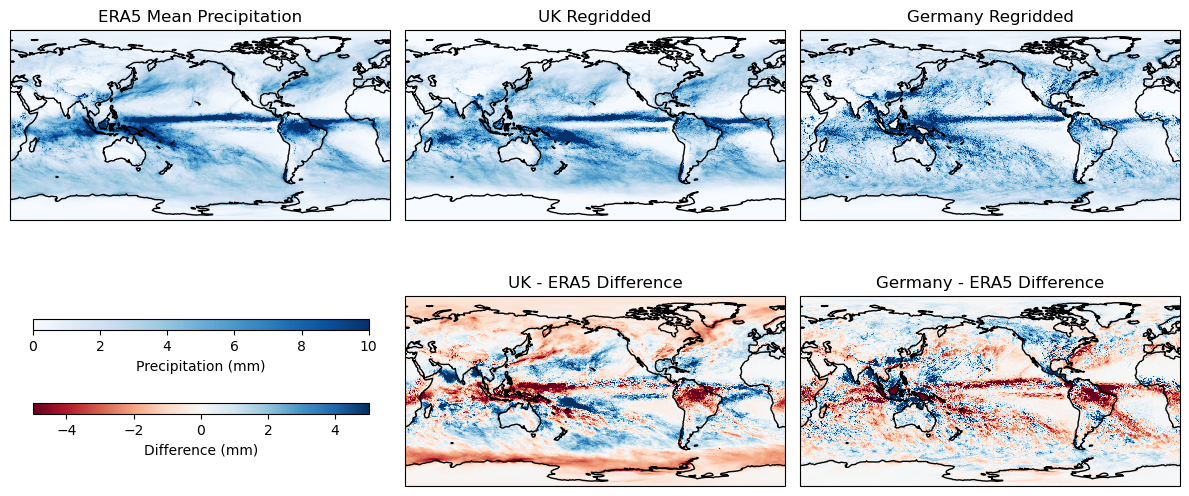

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

mon = 2
mon_name = ['DJF' , 'JJA' , 'MAM' , 'SON']
mean_all = [
    mean_era5_loaded[mon],
    mean_uk_aligned[mon],
    mean_germany_aligned[mon],
    diff_uk[mon],
    diff_germany[mon]
]

# Define projection
projection = ccrs.PlateCarree(central_longitude=205)

# Create 2 rows x 3 columns of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 6), subplot_kw={'projection': projection})
axes = axes.flatten()

# Main color scale (for mean values)
vmin_main, vmax_main = 0, 10

# Difference color scale
vmin_diff, vmax_diff = -5, 5

# 1. Plot ERA5 Mean
m0 = mean_all[0].plot(
    ax=axes[0],
    cmap='Blues',
    vmin=vmin_main,
    vmax=vmax_main,
    transform=ccrs.PlateCarree(),
    add_colorbar=False
)
axes[0].coastlines()
axes[0].set_title('ERA5 Mean Precipitation')

# 2. UK Regridded
mean_all[1].plot(
    ax=axes[1],
    cmap='Blues',
    vmin=vmin_main,
    vmax=vmax_main,
    transform=ccrs.PlateCarree(),
    add_colorbar=False
)
axes[1].coastlines()
axes[1].set_title('UK Regridded')

# 3. Germany Regridded
mean_all[2].plot(
    ax=axes[2],
    cmap='Blues',
    vmin=vmin_main,
    vmax=vmax_main,
    transform=ccrs.PlateCarree(),
    add_colorbar=False
)
axes[2].coastlines()
axes[2].set_title('Germany Regridded')

# 4. UK - ERA5
m1 = mean_all[3].plot(
    ax=axes[4],
    cmap='RdBu',
    vmin=vmin_diff,
    vmax=vmax_diff,
    transform=ccrs.PlateCarree(),
    add_colorbar=False
)
axes[4].coastlines()
axes[4].set_title('UK - ERA5 Difference')

# 5. Germany - ERA5
mean_all[4].plot(
    ax=axes[5],
    cmap='RdBu',
    vmin=vmin_diff,
    vmax=vmax_diff,
    transform=ccrs.PlateCarree(),
    add_colorbar=False
)
axes[5].coastlines()
axes[5].set_title('Germany - ERA5 Difference')

# Use axes[5] for the colorbars
axes[3].axis('off')

# Get position of axes[5]
pos = axes[3].get_position()

# Define inset axes for mean and diff colorbars inside axes[5]
mean_cax = fig.add_axes([pos.x0 - 0.12, pos.y0 + 0.27, 1.6 * pos.width, 0.05 * pos.height])
diff_cax = fig.add_axes([pos.x0 - 0.12, pos.y0 + 0.13, 1.6 * pos.width, 0.05 * pos.height])

# Mean colorbar
cbar_mean = fig.colorbar(m0, cax=mean_cax, orientation='horizontal')
cbar_mean.set_label('Precipitation (mm)', fontsize=10)

# Difference colorbar
cbar_diff = fig.colorbar(m1, cax=diff_cax, orientation='horizontal')
cbar_diff.set_label('Difference (mm)', fontsize=10)
plt.tight_layout()
name_save = "/scratch/nf33/sc5932/Fig/Diff_prcp_" + mon_name[mon]
plt.savefig(name_save , dpi=300, bbox_inches='tight')
